Step 14: following the step 9, K-means is applied two whole dataset with 4 clusters and then by using indexing, the distribution of each subject is analysed.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline

In [27]:
no_columns = 35 # number of features columns
no_channels = 6

file_path = './label_11features/'
data = pd.read_csv('EEG_features.csv')
file_name = data['fname']

In [28]:
df_concat = np.empty((0, 35))
for i in range(6):
    df_feat = pd.read_csv(file_path+file_name[i])
    df_concat = np.concatenate((df_concat, df_feat), axis=0)
    
print('Shape of concatenated data: {}' .format(df_concat.shape))

Shape of concatenated data: (5724, 35)


0.24427070397398934

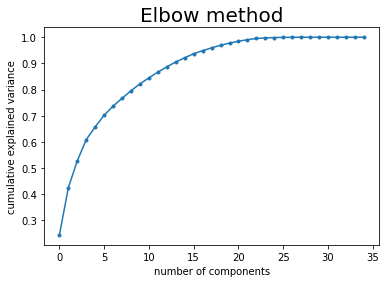

In [11]:
df_scalar = StandardScaler().fit_transform(df_concat)
X_pca = PCA()
X_pca.fit_transform(df_scalar)
#plt.figure(figsize=(10,8))
plt.plot(np.cumsum(X_pca.explained_variance_ratio_), '.-')
plt.title('Elbow method', fontsize=20)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
np.max(X_pca.explained_variance_ratio_)

Text(0, 0.5, 'within-cluster sum-of-squares')

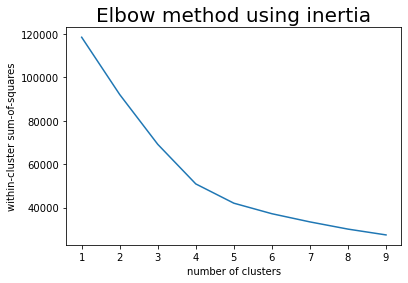

In [13]:
X_scalar = StandardScaler().fit_transform(df_concat)
X_pca = PCA(n_components=4).fit_transform(X_scalar)
distance = []
for i in range(1,10):
    kmeans_ = KMeans(i)
    kmeans_.fit(X_pca)
    distance.append(kmeans_.inertia_)
    
%matplotlib inline
plt.plot(np.arange(1,10), distance)
plt.title('Elbow method using inertia', fontsize=20)
plt.xlabel('number of clusters')
plt.ylabel('within-cluster sum-of-squares')

In [77]:
def plotting(fname, title):
    n_channels = np.arange((no_channels*fname), (no_channels*fname)+no_channels)
    df_concat = np.empty((0, 35))
    df_columns = np.empty((0))
    
    for i in n_channels:
        df_feat = pd.read_csv(file_path+file_name[i])
        df_concat = np.concatenate((df_concat, df_feat), axis=0)    
    df_columns = np.append(df_columns, df_feat.columns)
        
    df = pd.DataFrame(df_concat, columns=df_columns)
    df_features = df[df['flag'] == 0]
    X = df_features.drop(['flag', 'alpha_mean', 'delta_mean', 'theta_mean', 'label'], axis=1)
    X_scalar = StandardScaler().fit_transform(X)
    X_pca = PCA(n_components=4).fit_transform(X_scalar)
    model = KMeans(n_clusters=4, random_state=1).fit(X_pca)
    
    plt.title(title, fontsize=10)
    plt.hist( model.labels_)

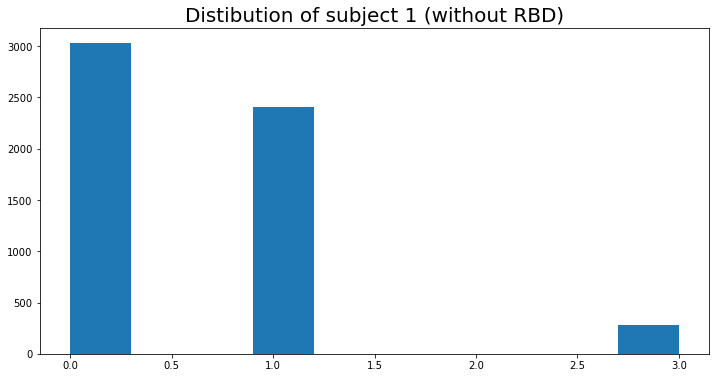

In [48]:
plotting(0, 'Distibution of subject 1 (without RBD)')


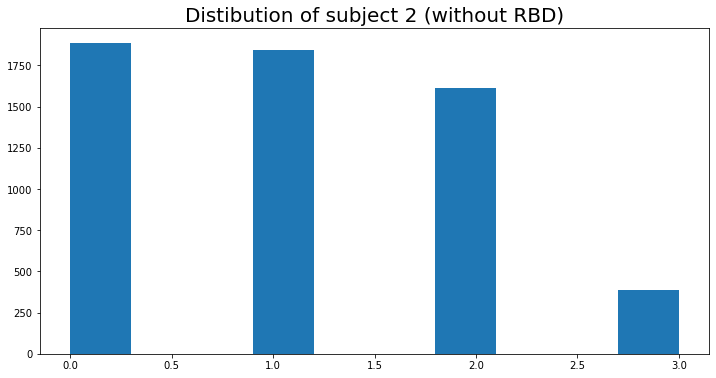

In [49]:
plotting(1, 'Distibution of subject 2 (without RBD)')


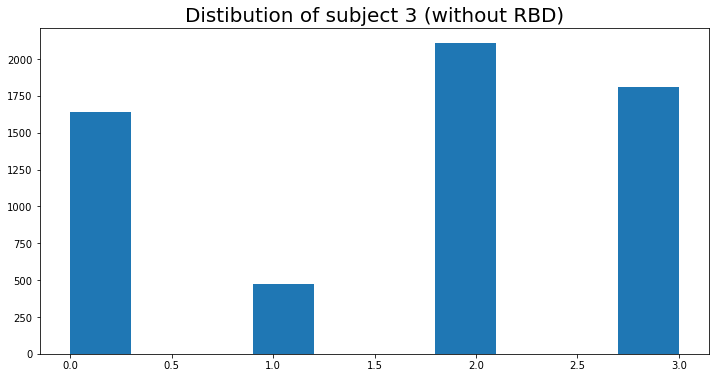

In [50]:
plotting(2, 'Distibution of subject 3 (without RBD)')


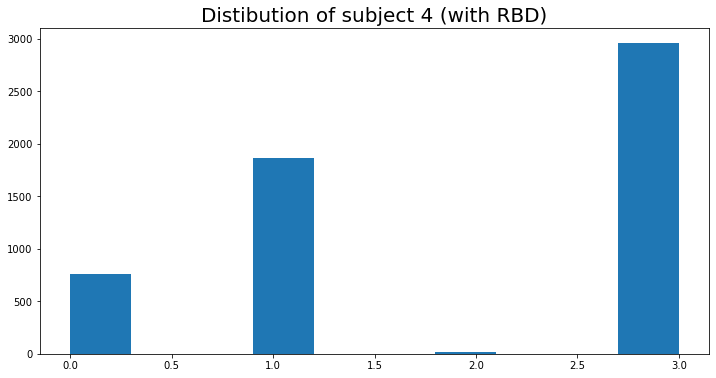

In [51]:
plotting(3, 'Distibution of subject 4 (with RBD)')


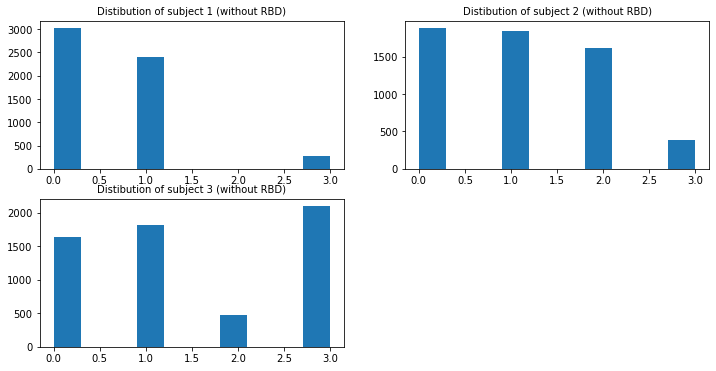

In [79]:
plt.figure(figsize=(12,6))
plt.subplot((221))
plotting(0, 'Distibution of subject 1 (without RBD)')
plt.subplot((222))
plotting(1, 'Distibution of subject 2 (without RBD)')
plt.subplot((223))
plotting(2, 'Distibution of subject 3 (without RBD)')

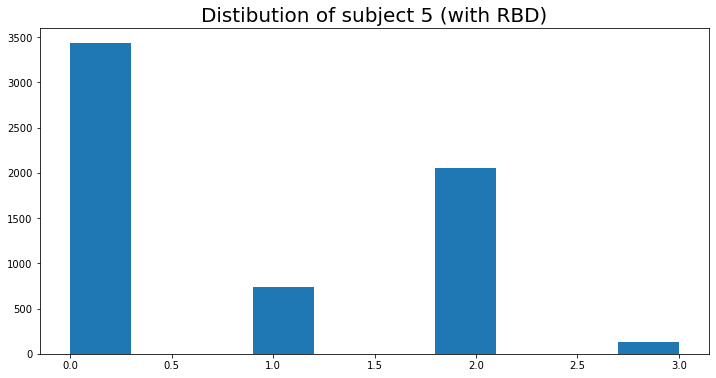

In [52]:
plotting(4, 'Distibution of subject 5 (with RBD)')


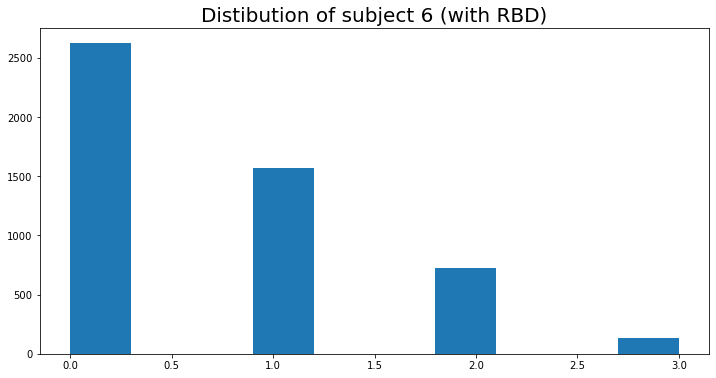

In [53]:

plotting(5, 'Distibution of subject 6 (with RBD)')


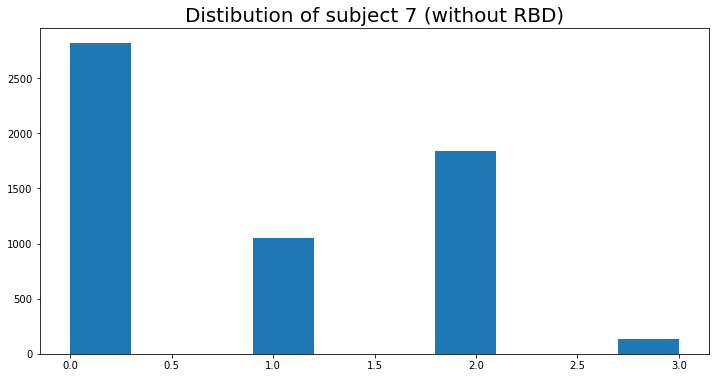

In [54]:

plotting(6, 'Distibution of subject 7 (without RBD)')


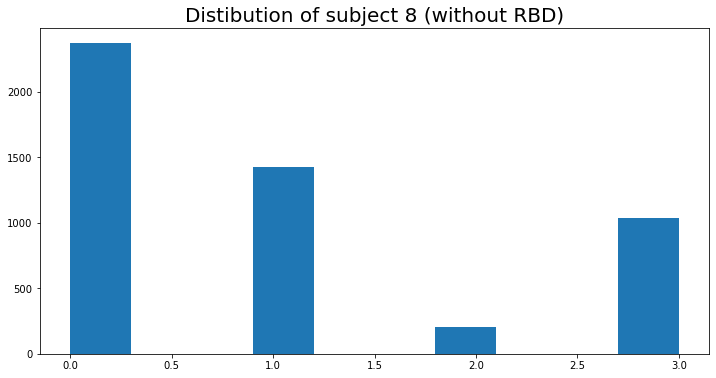

In [55]:

plotting(7, 'Distibution of subject 8 (without RBD)')


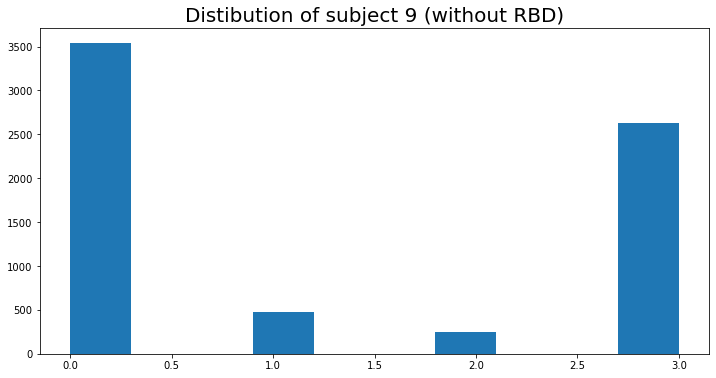

In [62]:

plotting(8, 'Distibution of subject 9 (without RBD)')


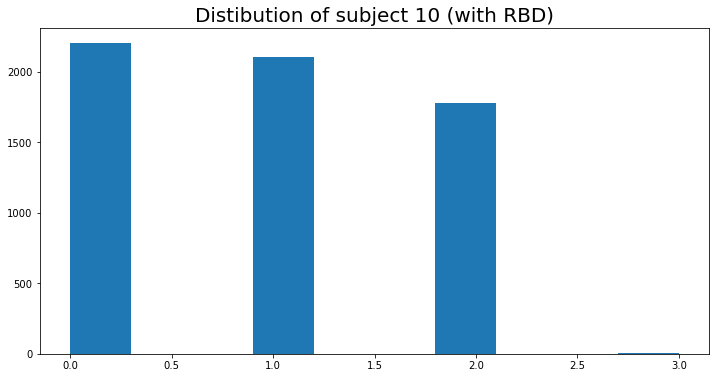

In [57]:
plotting(9, 'Distibution of subject 10 (with RBD)')


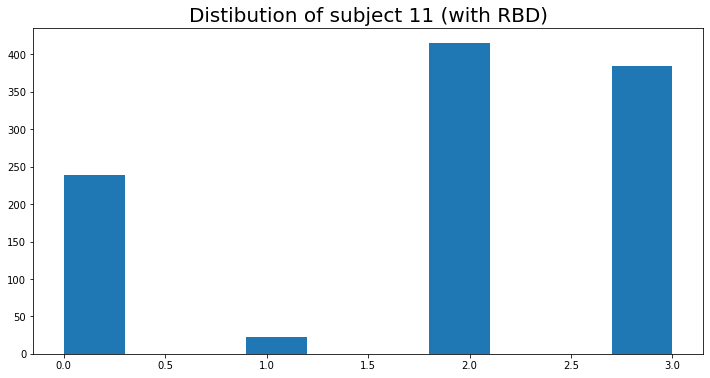

In [58]:
plotting(10, 'Distibution of subject 11 (with RBD)')


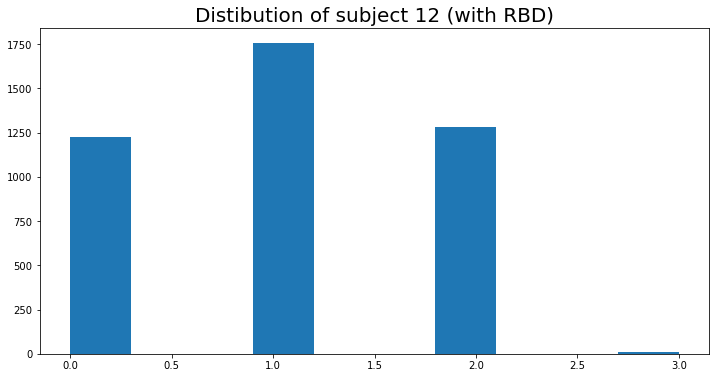

In [59]:

plotting(11, 'Distibution of subject 12 (with RBD)')


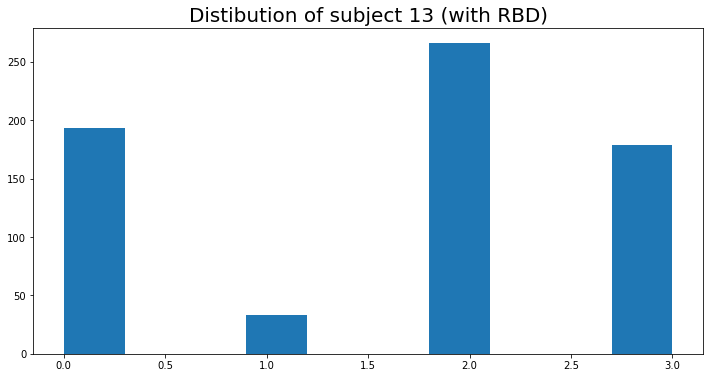

In [60]:
plotting(12, 'Distibution of subject 13 (with RBD)')


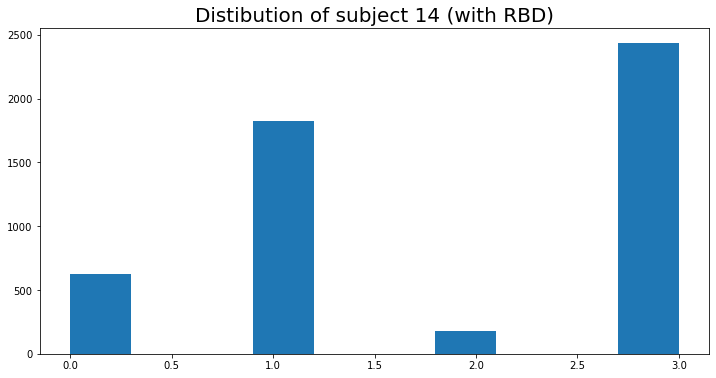

In [61]:
plotting(13, 'Distibution of subject 14 (with RBD)')


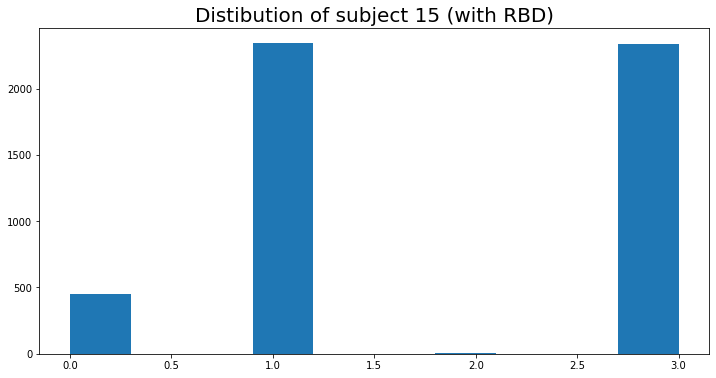

In [25]:
plotting(14, 'Distibution of subject 15 (with RBD)')


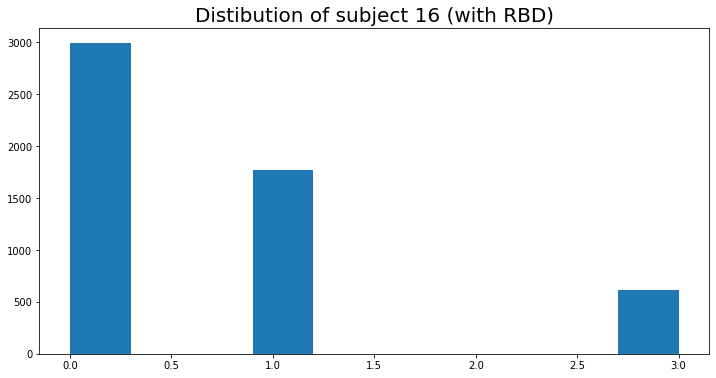

In [26]:
plotting(15, 'Distibution of subject 16 (with RBD)')


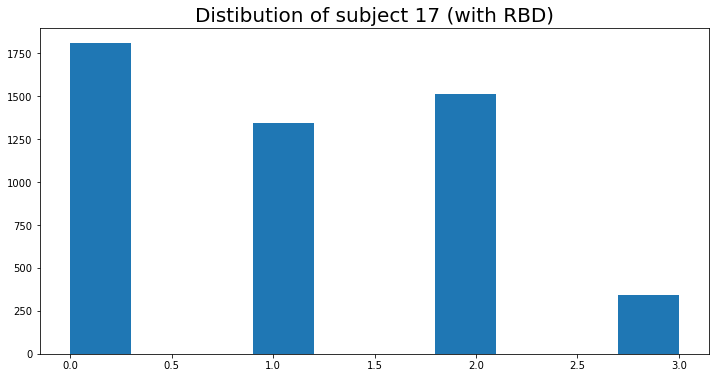

In [63]:
plotting(16, 'Distibution of subject 17 (with RBD)')


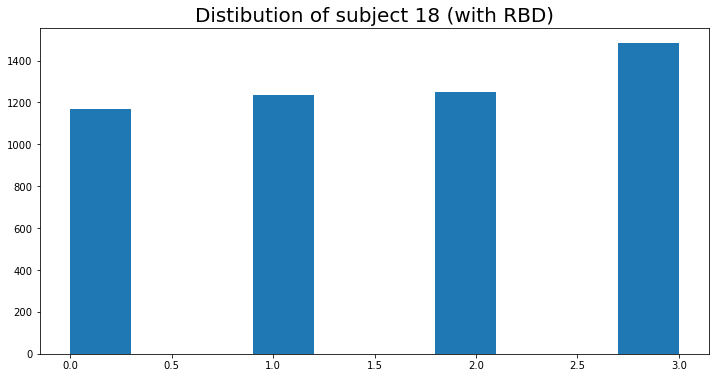

In [64]:
plotting(17, 'Distibution of subject 18 (with RBD)')


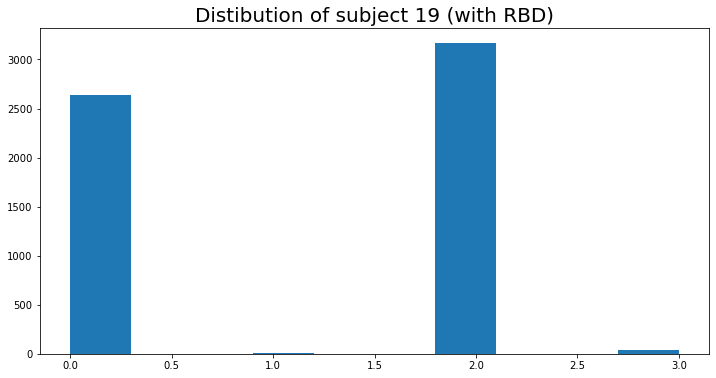

In [65]:
plotting(18, 'Distibution of subject 19 (with RBD)')


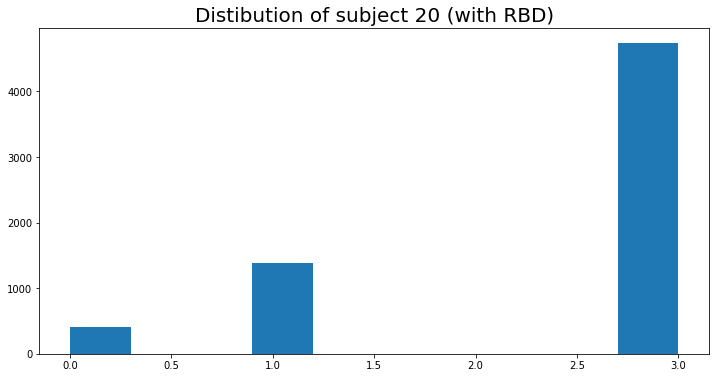

In [30]:
plotting(19, 'Distibution of subject 20 (with RBD)')


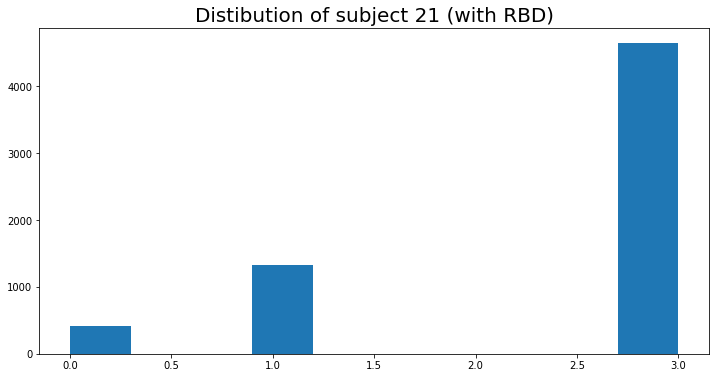

In [31]:
plotting(20, 'Distibution of subject 21 (with RBD)')


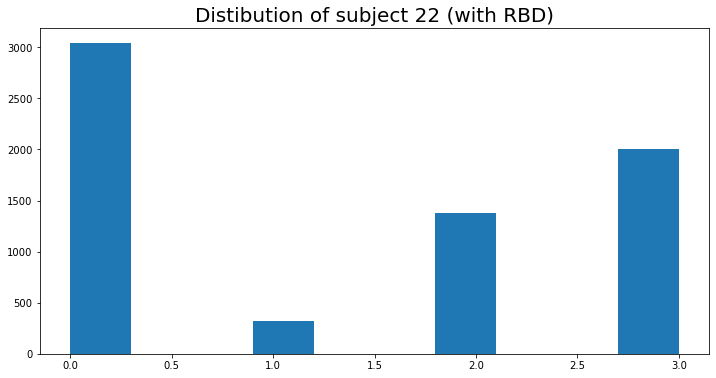

In [67]:
plotting(21, 'Distibution of subject 22 (with RBD)')


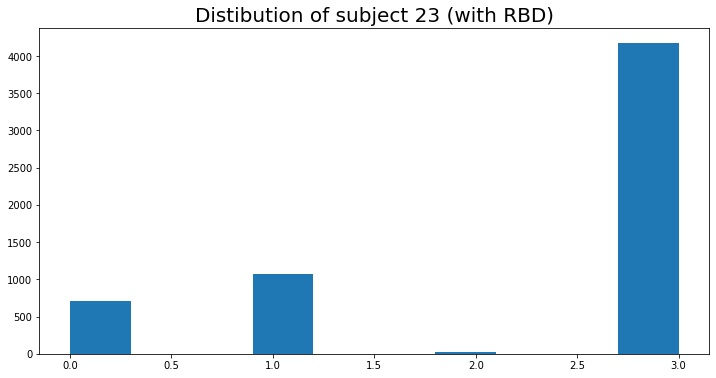

In [33]:
plotting(22, 'Distibution of subject 23 (with RBD)')


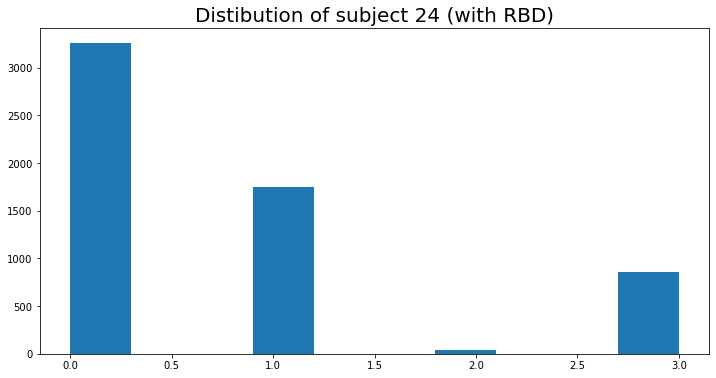

In [68]:
plotting(23, 'Distibution of subject 24 (with RBD)')


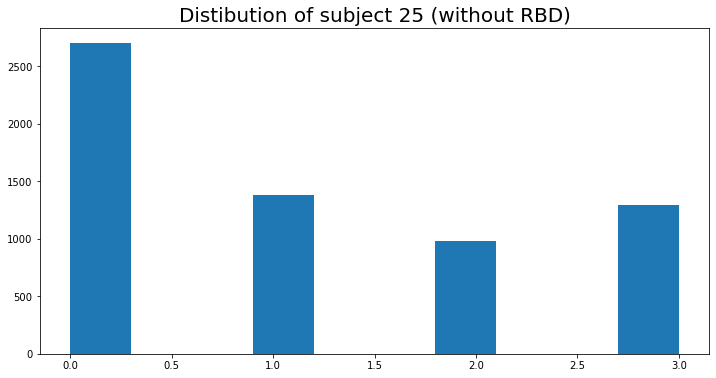

In [70]:
plotting(24, 'Distibution of subject 25 (without RBD)')


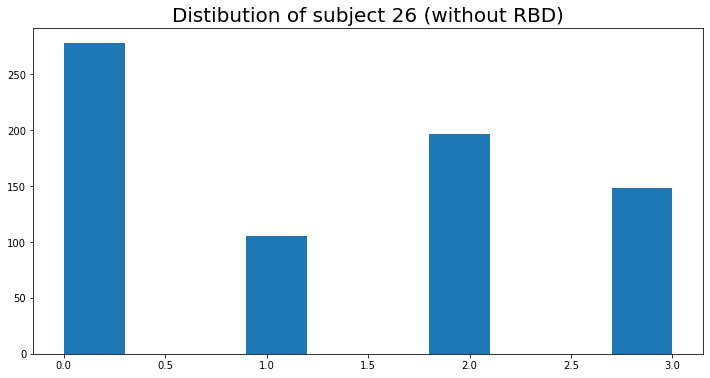

In [73]:
plotting(25, 'Distibution of subject 26 (without RBD)')


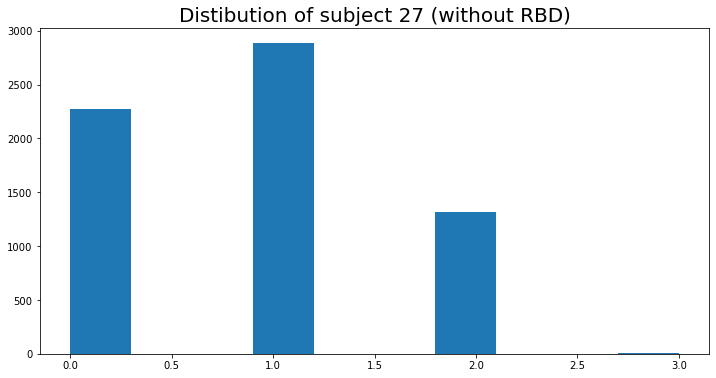

In [72]:
plotting(26, 'Distibution of subject 27 (without RBD)')
